# 05. Регрессия

Содержание:
- Регрессия
- Метрики
- Методы регрессии
- Ссылки

# 1. Постановка задачи регрессии


**Регрессия** $-$ это задача прогнозирования непрерывной числовой величины на основе входных данных.

**Примеры задач регрессии**:
- Прогнозирование цен на недвижимость
- Предсказание спроса на товары
- Оценка времени поездки
- Прогноз погоды

Пусть у нас есть:
- $X$ $-$ признаки объекта
- $y$ $-$ целевая переменная, которую мы хотим предсказать.
  
Наша цель: найти функцию $f$, такую что:

$$y \approx f(X).$$

# 2. Датасет для регрессии

Для иллюстрации методов регрессии будем использовать датасет [The California housing](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) $-$ датасет с ценнами на недвижимость.

Количество признаков: 8
Количество примеров: 20640

Названия признаков:
1. MedInc - средний доход в районе
2. HouseAge - средний возраст домов
3. AveRooms - среднее количество комнат
4. AveBedrms - среднее количество спален
5. Population - население района
6. AveOccup - средняя заполняемость домов
7. Latitude - широта
8. Longitude - долгота

## Загружаем данные

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем данные
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Выводим описание датасета
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Распределение признаков

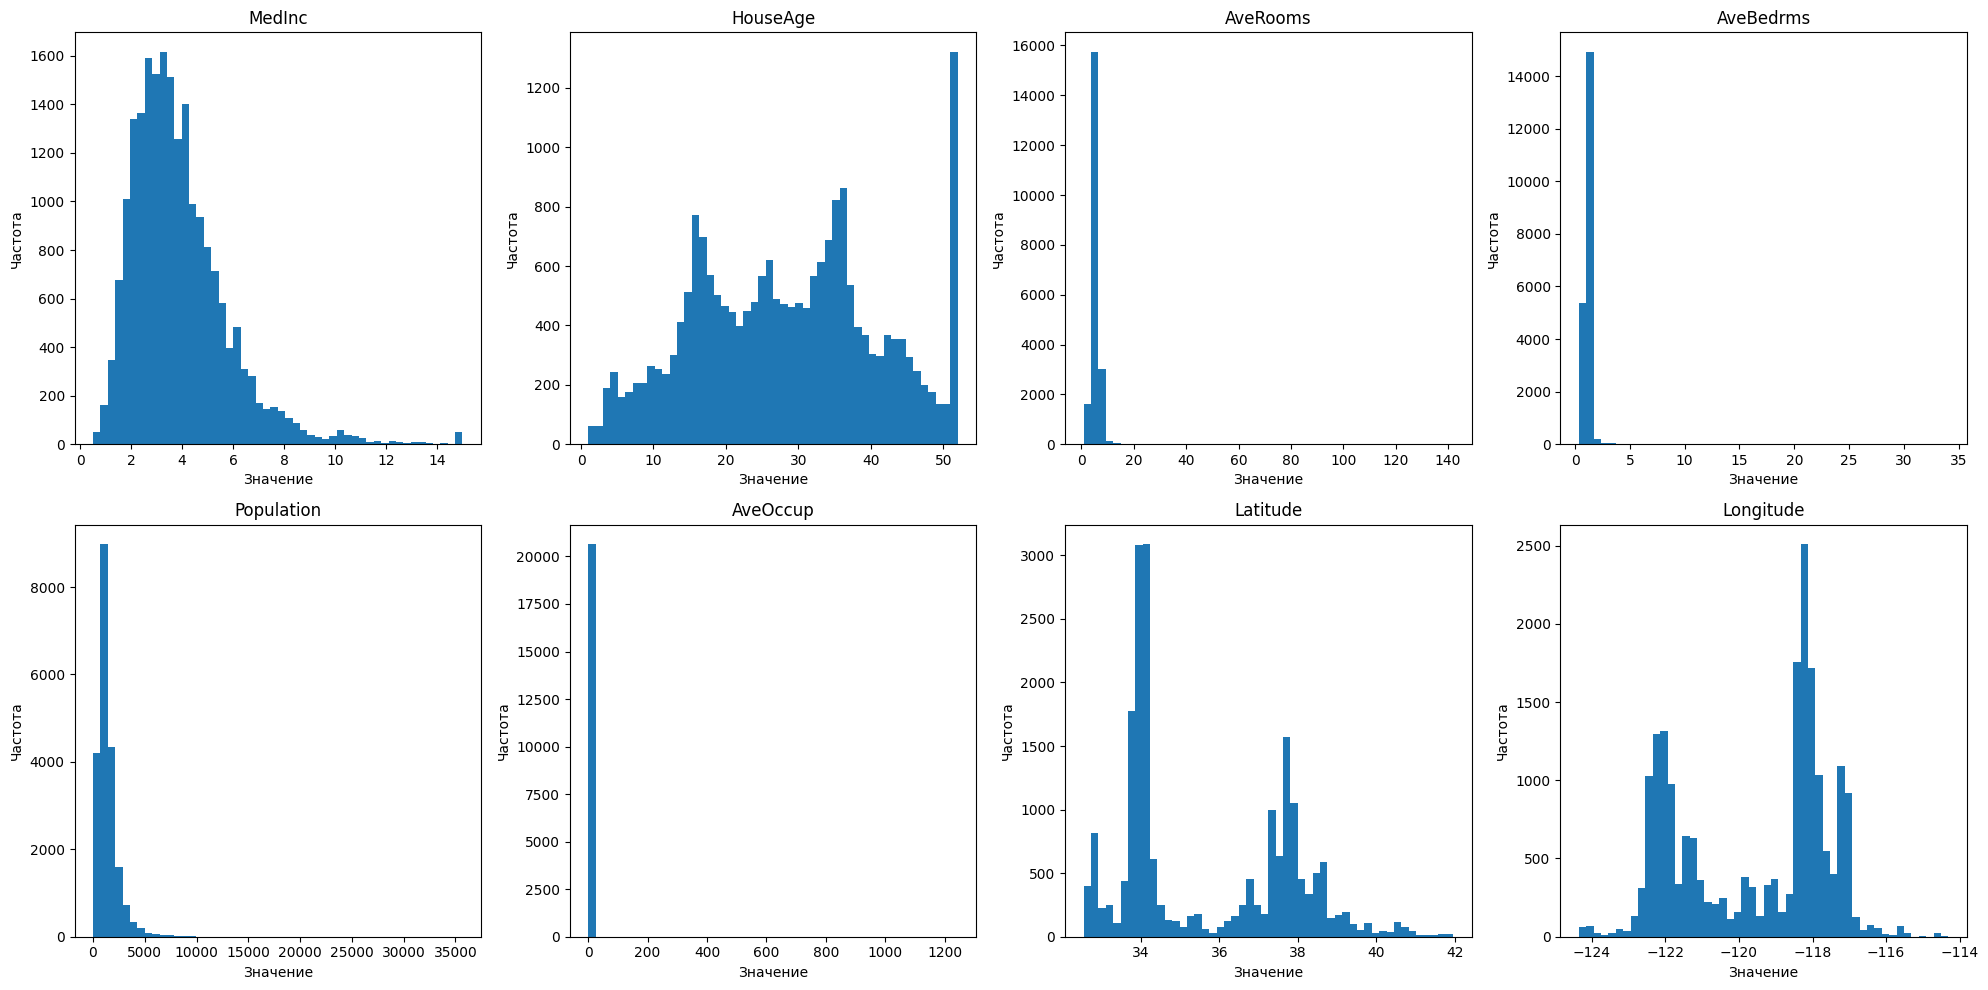

In [2]:
# Создаем графики
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

# Графики распределения каждого признака
for i in range(8):
    axes[i].hist(X[:, i], bins=50)
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

## Распределение целевой переменной (цены)

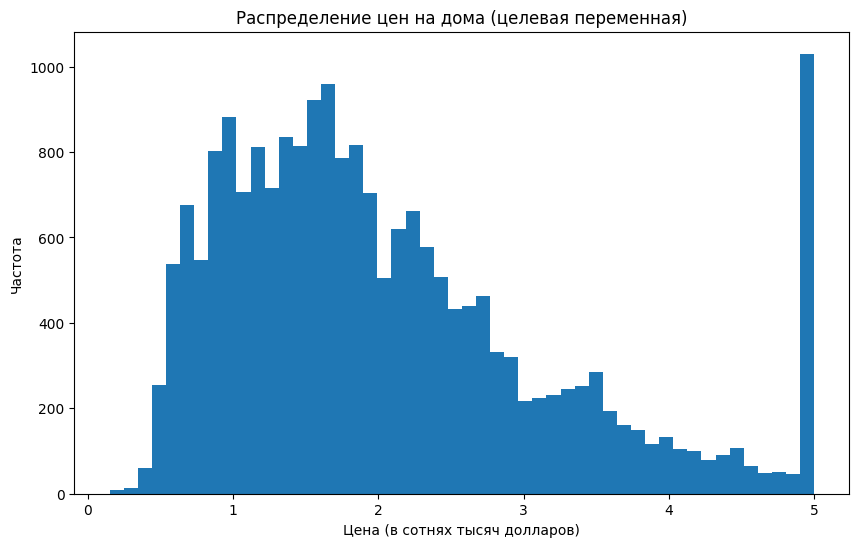

In [3]:
# Целевая переменная - цена домов
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50)
plt.title('Распределение цен на дома (целевая переменная)')
plt.xlabel('Цена (в сотнях тысяч долларов)')
plt.ylabel('Частота')
plt.show()

## Подготовка данных

In [4]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

Обучающая выборка: 16512 примеров
Тестовая выборка: 4128 примеров


## Корреляция между признаками и целевой переменной (ценой)

**Корреляция** $-$ это мера того,  насколько две величины "связаны" друг с другом:
- От -1 до +1.
- Бывает _положительная_ (растут вместе) и _отрицательная_ (одна растет, другая падает).
- Чем больше абсолютное значение, тем связь сильнее.

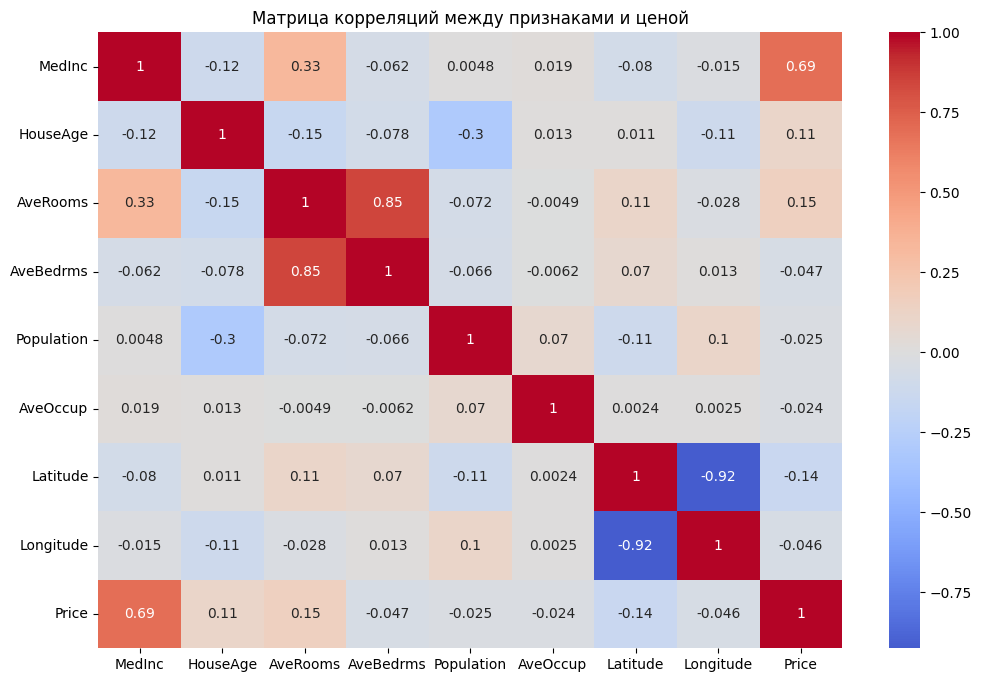

In [5]:
import pandas as pd

# Создаем DataFrame для удобства анализа
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y

# Матрица корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций между признаками и ценой')
plt.show()

# 3. Оценка качества в регрессии

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(y_true, y_pred, model_name):
    """Функция для оценки качества модели"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name}:")
    print(f"  MAE (Средняя абсолютная ошибка): {mae:.4f}")
    print(f"  MSE (Средняя квадратичная ошибка): {mse:.4f}")
    print(f"  RMSE (Среднеквадратичная ошибка): {rmse:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

**MAE** (Mean Absolute Error) $-$ средняя абсолютная ошибка:
$$ MAE = \frac{1}{n} \sum|y_{true} - y_{pred}|$$

$y_{pred}$ $-$ предсказанное значение, $y_{true}$ $-$ истинное значение

- Простая интерпретация: среднее отклонение предсказания от истинного значения
- Менее чувствительна к выбросам

**MSE** (Mean Squared Error) - средняя квадратичная ошибка:
$$ MSE = \frac{1}{n}\sum(y_{true} - y_{pred})^2$$

- Штрафует большие ошибки сильнее
- Чувствительна к выбросам

**RMSE** (Root Mean Squared Error) - корень из MSE:
$$RMSE = \sqrt{MSE}$$

- Имеет ту же размерность, что и целевая переменная
- Более интерпретируема, чем MSE

# 4. Методы регрессии: Линейная регрессия

## Теория

**Линейная регрессия** $-$ самый простой метод регрессии, который предполагает линейную зависимость между признаками и целевой переменной.

**Модель**: $$y = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

где:
- $y$ $-$ целевая переменная
- $x_1, x_2, \ldots, x_n$ $-$ признаки
- $w_1, w_2, \ldots w_n$ $-$ веса признаков
- $w_0$ $-$ свободный член

## Реализация

Линейная регрессия:
  MAE (Средняя абсолютная ошибка): 0.5332
  MSE (Средняя квадратичная ошибка): 0.5559
  RMSE (Среднеквадратичная ошибка): 0.7456


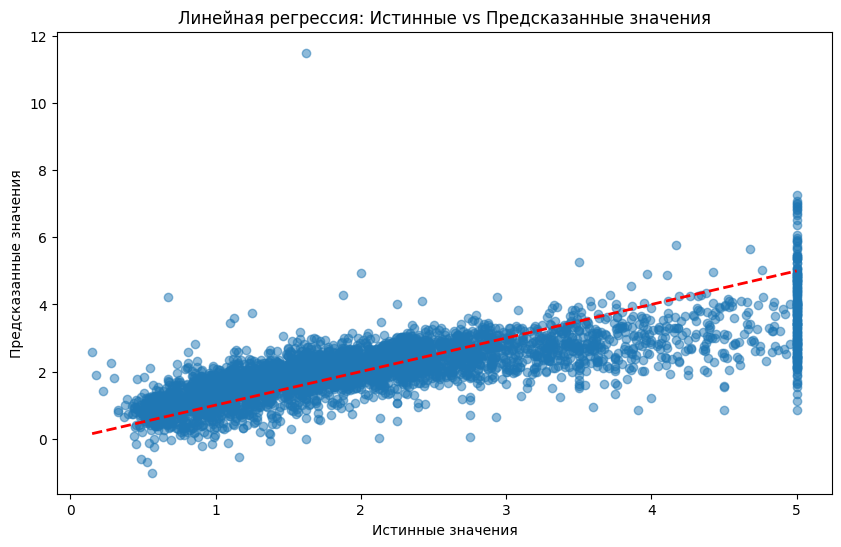

In [7]:
from sklearn.linear_model import LinearRegression

# Создаем и обучаем модель
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Предсказания
y_pred_lr = lr.predict(X_test_scaled)

# Оценка качества
lr_metrics = evaluate_model(y_test, y_pred_lr, "Линейная регрессия")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: Истинные vs Предсказанные значения')
plt.show()

## Преимущества и недостатки

**Преимущества**:
- Простота интерпретации
- Быстрое обучение и предсказание
- Хорошо работает, когда зависимость близка к линейной
- Мало гиперпараметров для настройки

**Недостатки**:
- Предполагает линейную зависимость
- Чувствительна к выбросам
- Не может моделировать сложные нелинейные зависимости
- Проблемы с мультиколлинеарностью

## Важность признаков

Веса признаков можно интерпретировать как вклад соответствующего признака в итоговое решение

In [8]:
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(lr.coef_)
})
feature_importance 

,feature,importance
0,MedInc,0.854383
1,HouseAge,0.122546
2,AveRooms,0.294410
3,AveBedrms,0.339259
4,Population,0.002308
5,AveOccup,0.040829
6,Latitude,0.896929
7,Longitude,0.869842


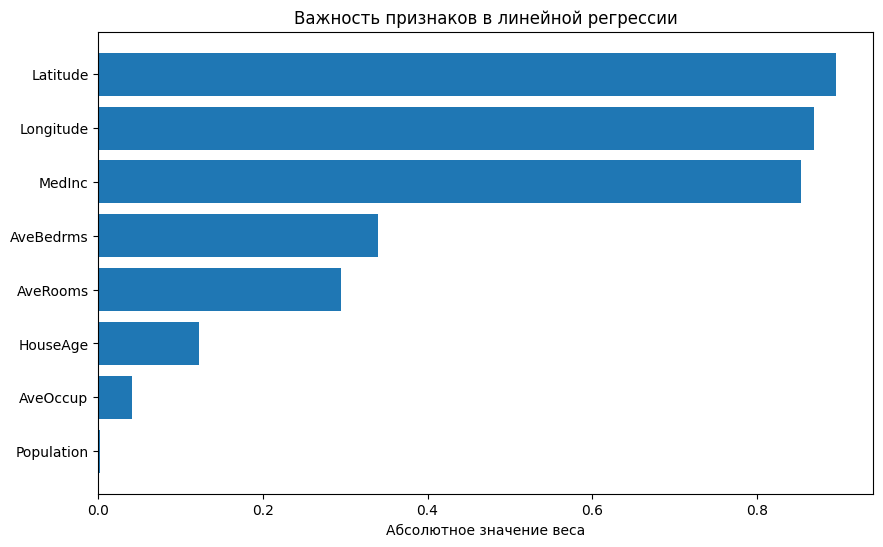

In [9]:
# Важность признаков
plt.figure(figsize=(10, 6))
feature_importance.sort_values('importance', ascending=True, inplace=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Важность признаков в линейной регрессии')
plt.xlabel('Абсолютное значение веса')
plt.show()

# 5. Деревья решений и случайный лес

**Дерево решений** $-$ основная идея остается той же, что и в классификации: разбить пространство данных на более простые области. Но вместо того чтобы предсказывать класс, мы предсказываем числовое значение (среднее значение целевой переменной в каждой области).

**Случайный лес** $-$ ансамбль из многих деревьев, который усредняет их предсказания для уменьшения переобучения.

## Дерево решений

In [10]:
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz

# Дерево решений
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_metrics = evaluate_model(y_test, y_pred_dt, "Дерево решений")

Дерево решений:
  MAE (Средняя абсолютная ошибка): 0.5978
  MSE (Средняя квадратичная ошибка): 0.6424
  RMSE (Среднеквадратичная ошибка): 0.8015


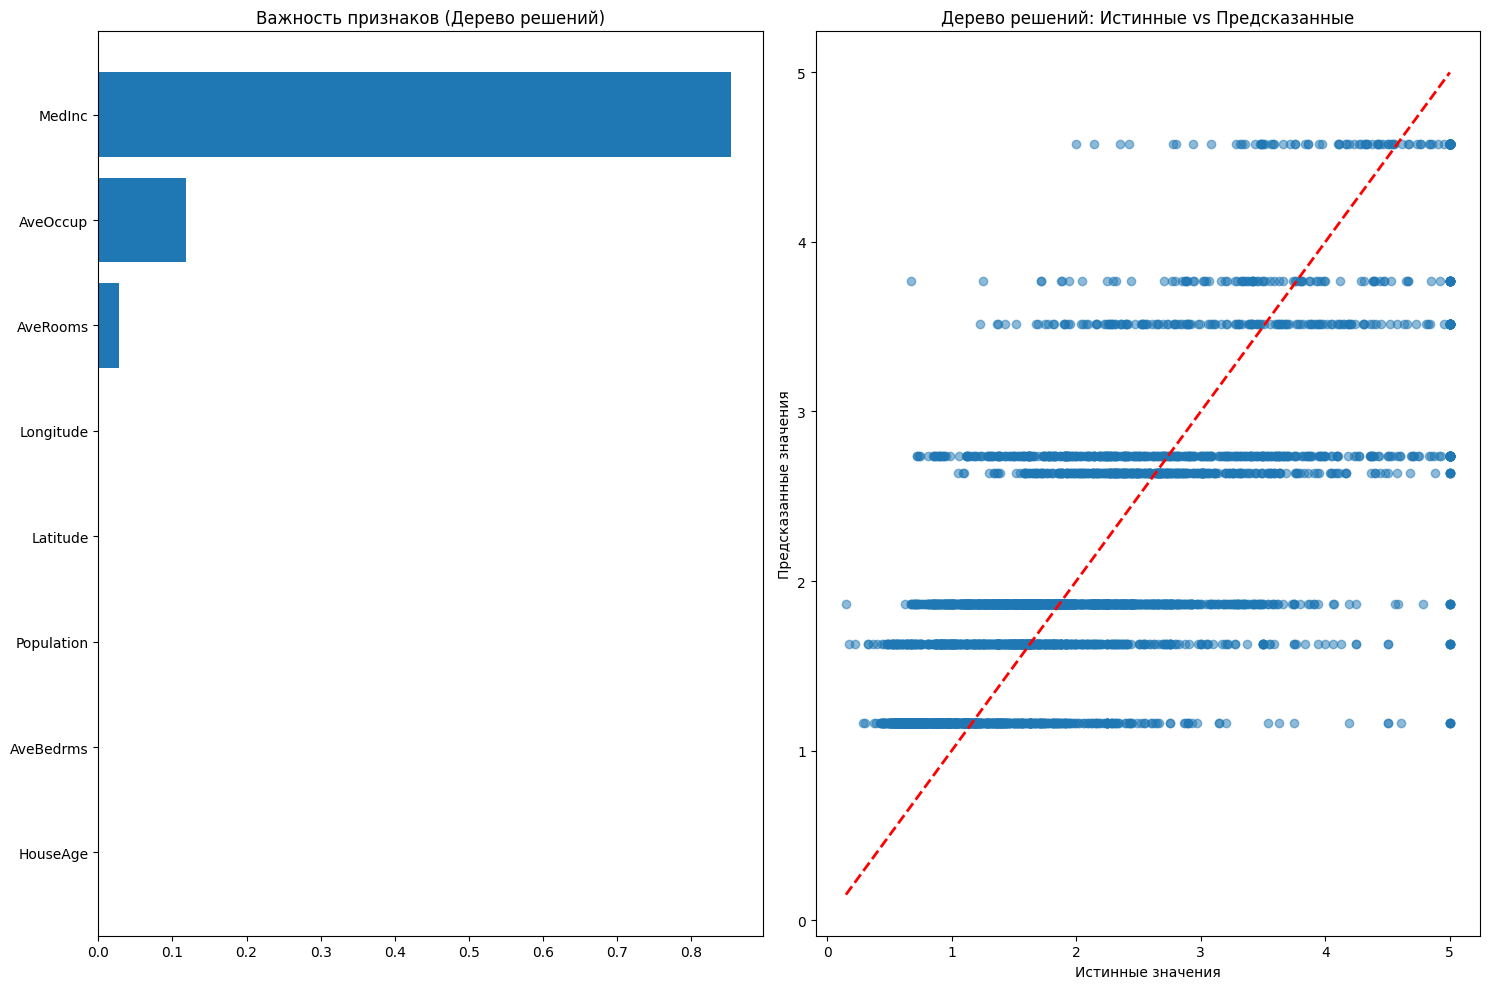

In [11]:
# Визуализация дерева (упрощенная)
plt.figure(figsize=(15, 10))

# Важность признаков в дереве
feature_importance_dt = pd.DataFrame({
    'feature': feature_names,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=True)

plt.subplot(1, 2, 1)
plt.barh(feature_importance_dt['feature'], feature_importance_dt['importance'])
plt.title('Важность признаков (Дерево решений)')

# Сравнение предсказаний
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений: Истинные vs Предсказанные')
plt.tight_layout()
plt.show()

### Преимущества и недостатки

**Преимущества**:
-  Просты для понимания и интерпретации
-  Могут моделировать нелинейные зависимости
-  Не требуют масштабирования данных

**Недостатки**:
-  Склонны к переобучению
-  Нестабильны (малые изменения данных могут сильно изменить дерево)

## Случайный лес

Случайный лес:
  MAE (Средняя абсолютная ошибка): 0.3275
  MSE (Средняя квадратичная ошибка): 0.2554
  RMSE (Среднеквадратичная ошибка): 0.5053


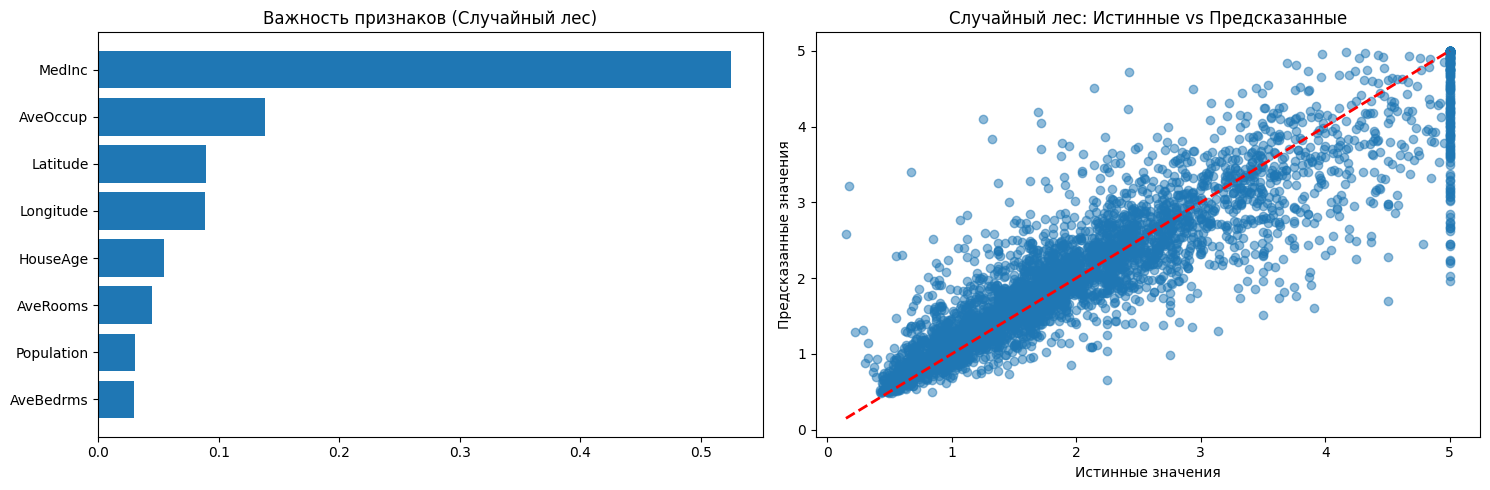

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = evaluate_model(y_test, y_pred_rf, "Случайный лес")

# Визуализация случайного леса
plt.figure(figsize=(15, 5))

# Важность признаков
plt.subplot(1, 2, 1)
feature_importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
plt.title('Важность признаков (Случайный лес)')

# Предсказания
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес: Истинные vs Предсказанные')
plt.tight_layout()
plt.show()

### Преимущества и недостатки

**Преимущества**:
- Уменьшает переобучение по сравнению с одним деревом
- Высокая точность
- Может оценивать важность признаков

**Недостатки**:
- Медленнее в обучении и предсказании
- Сложнее интерпретировать

# 6. Метод k-ближайших соседей (kNN)

**kNN для регрессии** находит $k$ ближайших соседей к новому объекту и предсказывает среднее значение их целевых переменных.

Алгоритм:
1. Для нового объекта находим $k$ ближайших точек в обучающей выборке
2. Предсказываем среднее значение целевой переменной этих $k$ точек

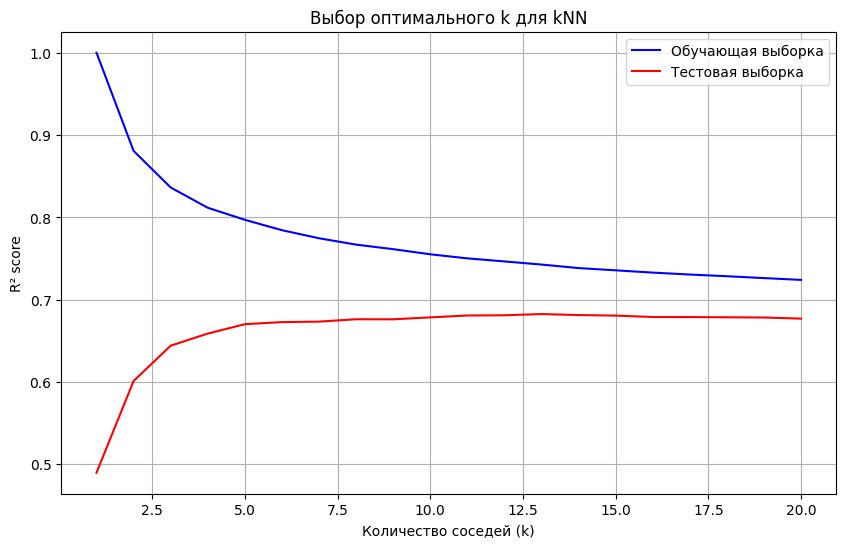

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# Поиск оптимального k
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Визуализация выбора k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, 'b-', label='Обучающая выборка')
plt.plot(k_values, test_scores, 'r-', label='Тестовая выборка')
plt.xlabel('Количество соседей (k)')
plt.ylabel('R² score')
plt.title('Выбор оптимального k для kNN')
plt.legend()
plt.grid(True)
plt.show()

Оптимальное количество соседей: 13
k-ближайших соседей:
  MAE (Средняя абсолютная ошибка): 0.4373
  MSE (Средняя квадратичная ошибка): 0.4163
  RMSE (Среднеквадратичная ошибка): 0.6452


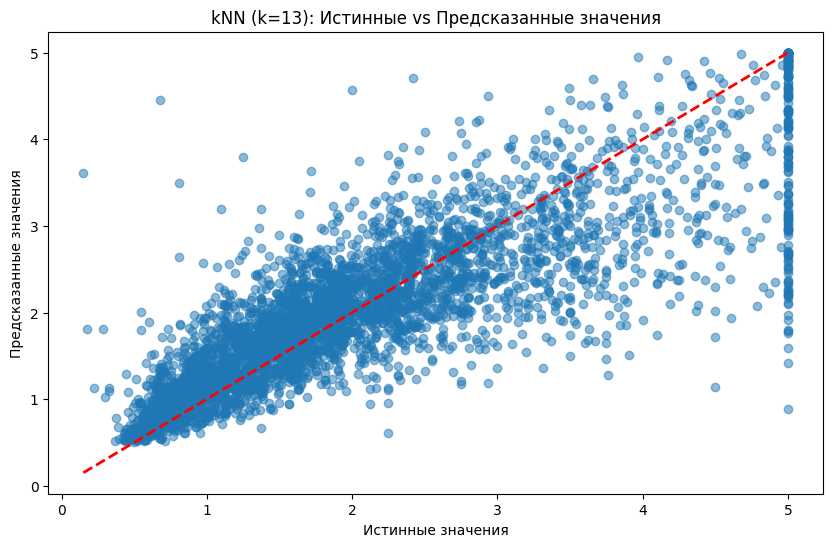

In [14]:
# Обучение с оптимальным k
optimal_k = k_values[np.argmax(test_scores)]
print(f"Оптимальное количество соседей: {optimal_k}")

knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_metrics = evaluate_model(y_test, y_pred_knn, "k-ближайших соседей")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'kNN (k={optimal_k}): Истинные vs Предсказанные значения')
plt.show()

## Преимущества и недостатки

**Преимущества**:
- Простота реализации и понимания
- Не требует предположений о распределении данных
- Легко адаптируется к новым данным
- Хорошо работает для небольших датасетов

**Недостатки**:
- Медленный для больших датасетов (нужно хранить все данные)
- Чувствителен к масштабированию признаков
- Плохо работает с данными высокой размерности
- Выбор $k$ критически важен для качества

# 7. Нейронные сети

**Нейронные сети** $-$ сложные модели, состоящие из множества взаимосвязанных "нейронов", которые могут изучать сложные нелинейные зависимости.

Простая нейросеть:
- Входной слой (признаки)
- Скрытые слои (обработка информации)
- Выходной слой (предсказание)

Нейронная сеть:
  MAE (Средняя абсолютная ошибка): 0.3563
  MSE (Средняя квадратичная ошибка): 0.2803
  RMSE (Среднеквадратичная ошибка): 0.5294


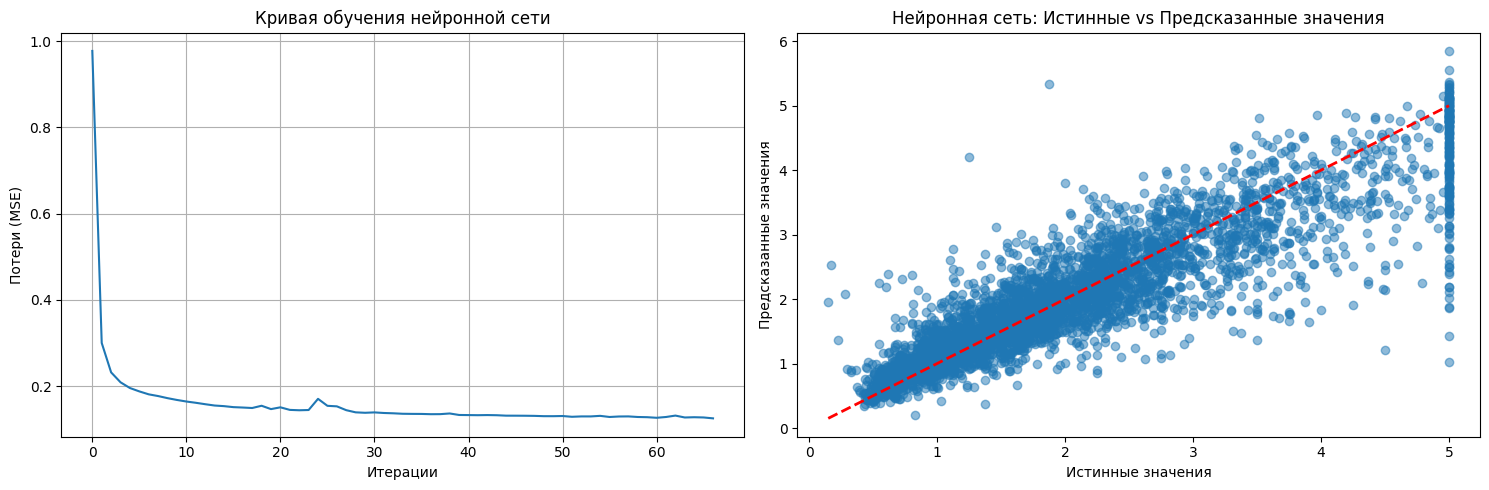

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Простая нейронная сеть
nn = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Два скрытых слоя: 100 и 50 нейронов
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Обучение с отслеживанием потерь
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
nn_metrics = evaluate_model(y_test, y_pred_nn, 'Нейронная сеть')

# Визуализация обучения
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(nn.loss_curve_)
plt.title('Кривая обучения нейронной сети')
plt.xlabel('Итерации')
plt.ylabel('Потери (MSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Нейронная сеть: Истинные vs Предсказанные значения')
plt.tight_layout()
plt.show()

## Преимущества и недостатки

**Преимущества**:
- Могут моделировать очень сложные нелинейные зависимости
- Хорошо масштабируются на большие датасеты
- Показывают state-of-the-art результаты на многих задачах
- Гибкость архитектуры

**Недостатки**:
- "Черный ящик" $-$ сложно интерпретировать
- Требуют много данных для обучения
- Долгое время обучения
- Чувствительны к гиперпараметрам
- Могут легко переобучиться

# Заключение

Сравнение моделей:
                       MAE     MSE    RMSE
Линейная регрессия  0.5332  0.5559  0.7456
Дерево решений      0.5978  0.6424  0.8015
Случайный лес       0.3275  0.2554  0.5053
kNN                 0.4373  0.4163  0.6452
Нейронная сеть      0.3563  0.2803  0.5294


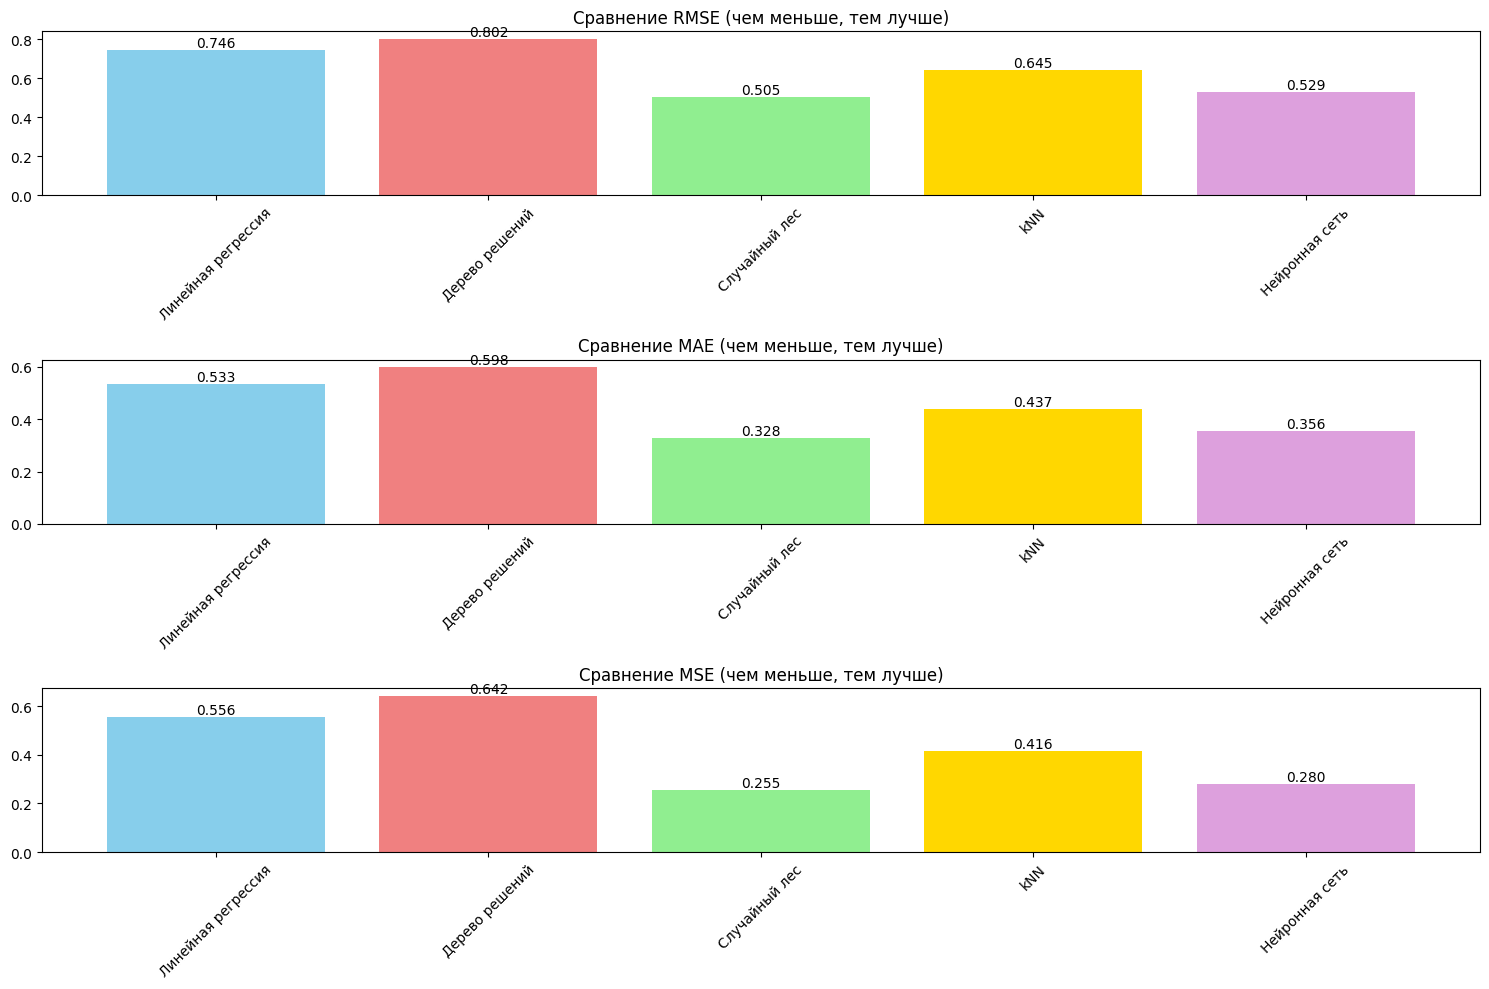

In [16]:
# Сравнение всех моделей
models_metrics = {
    'Линейная регрессия': lr_metrics,
    'Дерево решений': dt_metrics, 
    'Случайный лес': rf_metrics,
    'kNN': knn_metrics,
    'Нейронная сеть': nn_metrics
}

# Создаем таблицу сравнения
comparison_df = pd.DataFrame(models_metrics).T
print("Сравнение моделей:")
print(comparison_df.round(4))

# Визуализация сравнения
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes = axes.ravel()

metrics_to_plot = ['RMSE', 'MAE', 'MSE']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

for i, metric in enumerate(metrics_to_plot):
    values = [models_metrics[model][metric] for model in models_metrics.keys()]
    
    bars = axes[i].bar(models_metrics.keys(), values, color=colors)
    axes[i].set_title(f'Сравнение {metric} (чем меньше, тем лучше)')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.3f}', ha='center', va='bottom')
    
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Общие рекомендации выбора модели:

1. Начните с простых моделей (линейная регрессия)
2. Сравните базовые результаты на отложенных данных
3. Попробуйте более сложные модели, если точность недостаточна

# Ссылки для дальнейшего изучения
- [Основы линейной регрессии](https://habr.com/ru/articles/514818/)